## 1. 합성곱신경망 (30점)

#### 1. 완전연결신경망과 CNN의 차이에 대해 작성해주세요. (4점)

답: 전자는 affine계층 - 활성화함수계층, 출력층은 softmax계층으로 구성된 반면, CNN은 합성곱계층 - 활성화함수계층 - 풀링계층 의 흐름이 추가됐다.

#### 2. 완전연결신경망으로 이미지를 학습할 때의 문제점에 대해 작성해주세요. (4점)

답: 데이터의 형상을 무시하고, 공간적 정보를 유실한다.

#### 3. 67 * 67 * 3 (가로 * 세로 * 채널) 의 크기를 갖는 이미지에 1개의 5 * 5 * 3의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 2, 패딩 : 0) (4점)

답 : 32 * 32 * 1

#### 4. 67 * 67 * 3 의 크기를 갖는 이미지에 16개의 5 * 5 * 3의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 2, 패딩 : 2) (4점)

답 : 34 * 34 * 16

#### 5. 124 * 124 * 3 의 크기를 갖는 이미지에 32개의 7 * 7 * 3의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 3, 패딩 : 3) (3점)

답 : 42 * 42 * 32

#### 6. 5번의 결과로 나온 피처맵을 3 * 3 최대 풀링 계층에 통과시켜 얻는 피처맵의 크기를 구해주세요. (3점)

답 : 14 * 14 * 32

#### 7. 풀링 계층의 특징을 맞는 것을 모두 골라주세요. (4점)

>1. 학습해야 할 매개변수가 없다
>2. 채널 수가 변하지 않는다
>3. 입력의 변화에 영향을 적게 받는다

답 : 1, 2, 3

#### 8. 반드시 지켜야 하는 합성곱 계층의 특징을 골라주세요. (4점)

>1. 입력 피처맵의 채널 수 = 필터의 채널 수 = 출력 피처맵의 채널 수
>2. 입력 피처맵의 채널 수 = 출력 피처맵의 채널 수
>3. 입력 피처맵의 채널 수 = 필터의 채널 수
>4. 필터의 채널 수 = 출력 피처맵의 채널 수

답 : 3

## 2. 합성곱신경망 계층 구현 (20점)

#### 1. 아래 합성곱계층 구현 코드의 빈칸을 채워주세요. (10점)

In [1]:
import numpy as np

def convolution(input_matrix, filter_matrix):
    # 입력 행렬과 필터 행렬의 크기를 확인
    input_rows, input_cols = input_matrix.shape
    filter_rows, filter_cols = filter_matrix.shape

    # 필터가 입력 행렬보다 작아야 연산 가능
    if filter_rows > input_rows or filter_cols > input_cols:
        raise ValueError()

    # convolution 결과를 저장할 빈 행렬 생성 stride와 padding은 없다고 가정
    result_matrix = np.zeros((input_rows-filter_rows+1, input_cols-filter_cols+1))

    # convolution 연산 수행
    for i in range(result_matrix.shape[0]):
        for j in range(result_matrix.shape[1]):
            result_matrix[i, j] = np.sum(input_matrix[i:i + filter_rows, j:j + filter_cols] * filter_matrix)

    return result_matrix

# 예시를 위해 간단한 행렬 생성
input_matrix = np.random.randint(-10, 10, size=(5, 5)) 

filter_matrix = np.random.randint(-10, 10, size=(3, 3)) 

# convolution 연산 수행
result = convolution(input_matrix, filter_matrix)

print("입력 행렬:")
print(input_matrix)

print("\n필터 행렬:")
print(filter_matrix)

print("\nConvolution 결과:")
print(result)


입력 행렬:
[[  1   9  -1   4  -4]
 [ -2   7   7   0   8]
 [  3   2  -5  -2  -9]
 [ -5  -5  -3 -10  -1]
 [ -4   4  -9  -9  -4]]

필터 행렬:
[[ 2 -4 -4]
 [-8 -3  5]
 [ 0  8 -2]]

Convolution 결과:
[[  26. -107.  -16.]
 [-149.  -29.  -95.]
 [ 108.  -23.   19.]]


#### 2. 아래 풀링계층 구현 코드의 빈칸을 채워주세요. (10점)

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# 평균=0.5, 표준편차=1.0이 되도록 데이터의 분포(normalize)를 조정
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])


download_root = './'    # 내려받을 경로 지정!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

mnist_train = MNIST(root = download_root, train = True,
                      transform=mnist_transform, download=True)

In [4]:
#실행해주세요

# dataset[idx]로 첫번째 이미지(텐서)와 라벨 출력
image, label = mnist_train[0]
print(image.size(), label)

torch.Size([1, 28, 28]) 5


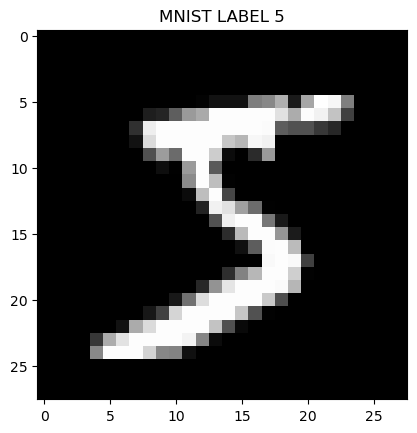

In [5]:
#실행해주세요

# 0번째 이미지 시각화 (원본)
plt.figure()
plt.title("MNIST LABEL {}".format(label))
plt.imshow(image[0], cmap="gray")
plt.show()

In [6]:
# output_1 : max 풀링, 윈도우 크기 = 2
# output_2 : avg 풀링, 윈도우 크기 = 2
# output_3 : max 풀링, 윈도우 크기 = 3
# output_4 : avg 풀링, 윈도우 크기 = 3

max_pool_2 = nn.MaxPool2d(2)
output_1 = max_pool_2(image)
print(output_1.size())

avg_pool_2 = nn.AvgPool2d(2)
output_2 = avg_pool_2(image)
print(output_2.size())

max_pool_3 = nn.MaxPool2d(3)
output_3 = max_pool_3(image)
print(output_3.size())

avg_pool_3 = nn.AvgPool2d(3)
output_4 = avg_pool_3(image)
print(output_4.size())

torch.Size([1, 14, 14])
torch.Size([1, 14, 14])
torch.Size([1, 9, 9])
torch.Size([1, 9, 9])


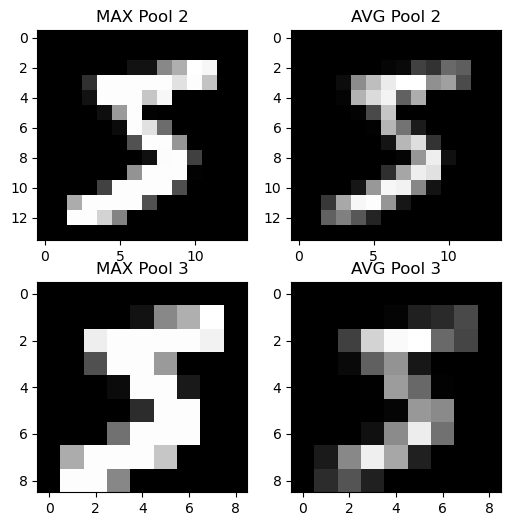

In [7]:
#실행해주세요

fig, axs = plt.subplots(2, 2, figsize=(6, 6)) # figsize는 적절히 조정 가능

# 첫 번째 이미지
axs[0, 0].imshow(output_1[0], cmap='gray')
axs[0, 0].title.set_text('MAX Pool 2')

# 두 번째 이미지
axs[0, 1].imshow(output_2[0], cmap='gray')
axs[0, 1].title.set_text('AVG Pool 2')

# 세 번째 이미지
axs[1, 0].imshow(output_3[0], cmap='gray')
axs[1, 0].title.set_text('MAX Pool 3')

# 네 번째 이미지
axs[1, 1].imshow(output_4[0], cmap='gray')
axs[1, 1].title.set_text('AVG Pool 3')

# 전체 그림을 보여줍니다.
plt.show()